#### In this notebook, I compare the Log Spectral Flux Onset Detection Function to the NINOS² Onset Detection Function (ODF) According to:
``` Mounir, M., Karsmakers, P. & van Waterschoot, T. Musical note onset detection based on a spectral sparsity measure. J AUDIO SPEECH MUSIC PROC. 2021, 30 (2021). https://doi.org/10.1186/s13636-021-00214-7```

In [112]:
import numpy as np
import librosa as lb
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from scipy.signal.windows import hamming

In [113]:
input_sig, fs = lb.load('../audio/pop_shuffle.wav', sr=44100)

first thing's first, compute the spectrogram with the STFT

In [118]:
stride = int(0.001*fs)
n_fft = 4096
spectrogram = lb.amplitude_to_db(np.abs(lb.stft(input_sig, n_fft=n_fft, hop_length=stride, window=hamming)), ref=np.max)
spectrogram.shape

(2049, 4966)

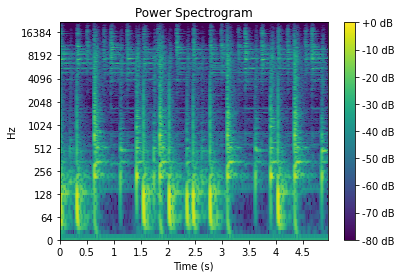

In [119]:
fig, ax = plt.subplots()
ax.set_title('Power Spectrogram')
img = lb.display.specshow(spectrogram, y_axis='log', x_axis='s', ax=ax, sr=fs, hop_length=stride, cmap=plt.get_cmap('viridis'))
fig.colorbar(img, format='%+2.0f dB')


Now let's define some functions that will soon prove useful. 

In [151]:
def l1_norm(x: np.ndarray) -> float:
    return np.sum(np.abs(x))

def l2_norm(x: np.ndarray) -> float:
    return np.sqrt(np.sum(x**2))
    
def ln_norm(x: np.ndarray, n: int) -> float:
    return np.power(np.sum(x**n), 1/n)

test = np.array([0.,1,2,3,4])
print(l1_norm(test))
print(ln_norm(test, 1))
print(l2_norm(test))
print(ln_norm(test, 2))

10.0
10.0
5.477225575051661
5.477225575051661


This is the Log Spectral Flux (LSF) ODF; a very simple baseline to compare to.

In [177]:
def log_spectral_flux(x: np.ndarray) -> np.ndarray:
    """Return the LSF of x, where x is assumed to be a log-scaled spectrogram."""
    N = x.shape[0]
    # vectorized subtraction
    pad = np.zeros((N, 1)) # zero padding on first column
    x_prev = np.concatenate((pad, x), axis=1)[:, :-1] # without last column
    Hx = x - x_prev
    # half-wave recitification
    LSF = (Hx + np.abs(Hx)) * 0.5
    # sum on frequency axis
    LSF = np.sum(LSF, axis=0)
    # normalize
    LSF /= ln_norm(LSF, 4)
    return LSF 

In [178]:
LSF = log_spectral_flux(spectrogram)
LSF.size

4966

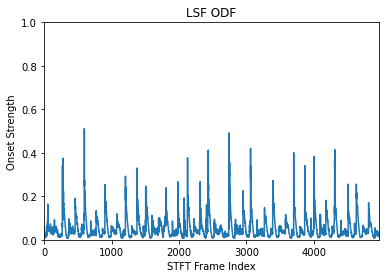

In [179]:
plt.figure()
plt.plot(LSF)
plt.xlabel('STFT Frame Index')
plt.ylabel('Onset Strength')
plt.ylim(0, 1)
plt.title('LSF ODF')
plt.margins(0,0)
plt.show()

In [141]:
def preprocess(x):
    pass

In [ ]:
def ninos2(x):
    pass